In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from operator import add
import os
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.ticker import FixedLocator


sns.set_style("ticks")
font = {
    "font.family": "Roboto",
    "font.size": 12,
}
sns.set_style(font)
paper_rc = {
    "lines.linewidth": 3,
    "lines.markersize": 10,
}
sns.set_context("paper", font_scale=1.8, rc=paper_rc)
current_palette = sns.color_palette()
cmp = sns.color_palette("tab10")

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "%.1f" % height,
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 4),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            size=14,
        )
    
def autolabel_h(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate(
            "%.2f" % width,
            xy=(width, rect.get_y() + rect.get_height() / 2),
            xytext=(18, -1),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="center",
            size=13,
        )

SAVEPATH = './'
os.makedirs(SAVEPATH, exist_ok=True)

# Figure 8(a)

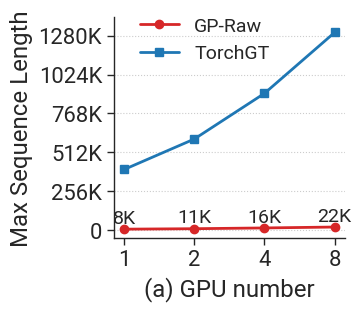

In [6]:
cmp = sns.color_palette("tab10")
fig, (ax) = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(3.5, 3))
# fig.subplots_adjust(wspace=0.5, hspace =0)

######################## Fig (a) ########################
x = np.arange(1, 5)
fullattn_max_seq = [8, 11, 16, 22] # In K
my_max_seq = [400, 600, 900, 1300] # TODO: replace data here. In K

width = 0.34

p1 = ax.plot(x, fullattn_max_seq, label='GP-Raw', linewidth=2, marker="o", alpha=1, color=cmp[3], ms=6)
p2 = ax.plot(x, my_max_seq, label='TorchGT', linewidth=2, marker="s", alpha=1, color=cmp[0], ms=6)

for i in range(len(fullattn_max_seq)):
    ax.text(x[i], fullattn_max_seq[i]+40, '%dK' %round(fullattn_max_seq[i],3), ha='center', fontsize=14)
    
ax.set_ylabel(f"Max Sequence Length")
ax.set_xticks(x)
ax.set_xlabel(f"(a) GPU number")
ax.set_xticklabels([1, 2, 4, 8])
ax.set_ylim(-50, 1400)

yticks = [str(i)+"K" for i in np.arange(0, 1400, 256)]
yticks[0] = "0"
ax.set_yticks(np.arange(0, 1400, 256),yticks)
ax.grid(axis="y", linestyle=":")


legend = ax.legend(
    loc=1,
    # handles=[p1, p2],
    bbox_to_anchor=(0.75, 1.08),
    ncol=1,
    frameon=False,
    fancybox=True,
    shadow=True,
    fontsize=14,
)


sns.despine()


save = False
if save:
    fig.savefig(f"{SAVEPATH}/scalability.pdf", bbox_inches="tight")

# Figure 11(a)

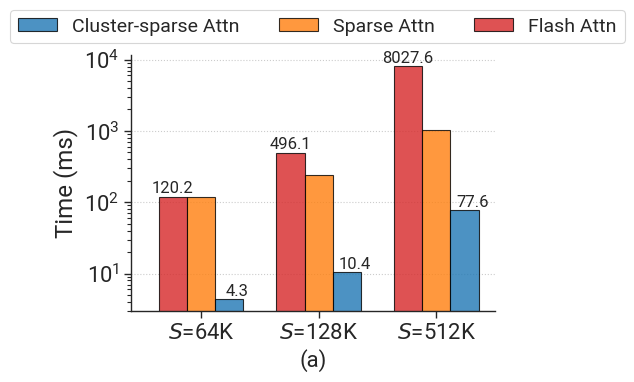

In [4]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "%.1f" % height,
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 0.6),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            size=12,
        )
        
def autolabel2(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "%.1f" % height,
            xy=(rect.get_x() + rect.get_width() / 2 + 0.07, height),
            xytext=(0, 0.6),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            size=12,
        )


cmp = sns.color_palette("tab10")
fig, (ax) = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(4.5, 3.3))

######################## Fig (a) ########################

labels = [r"$S$"+"=64K", r"$S$"+"=128K", r"$S$"+"=512K"]

flash_attn_time = np.array([120.15, 496.149, 8027.57]) # TODO: replace data here. In ms
sparse_attn_time = np.array([120.16, 242.01, 1019.68]) # TODO: replace data here. In ms
my_attn_time = np.array([4.35, 10.43, 77.58]) # TODO: replace data here. In ms

width = 0.24
x_ticks = np.arange(1, 4)
x = np.arange(0, 2)

A = ax.bar(x_ticks - width, flash_attn_time, width, edgecolor="k", label='BW', alpha=0.8, color = [cmp[3]])
B = ax.bar(x_ticks, sparse_attn_time, width, edgecolor="k", label='BW', alpha=0.8, color = [cmp[1]])
C = ax.bar(x_ticks + width, my_attn_time, width, edgecolor="k", label='BW', alpha=0.8, color = [cmp[0]])
ax.set_yscale("log", base=10)
autolabel(A, ax)
# autolabel2(B, ax)
autolabel2(C, ax)


ax.set_ylabel('Time (ms)')

ax.set_xlim(0.4, 3.5)
ax.set_xticks(x_ticks)
ax.set_xticklabels(labels)
ax.grid(axis="y", linestyle=":")
ax.set_xlabel('(a)', fontsize=16)

A = mpatches.Patch(facecolor=cmp[0], alpha=0.8, edgecolor="black", label="Cluster-sparse Attn")
B = mpatches.Patch(facecolor=cmp[1], alpha=0.8, edgecolor="black", label="Sparse Attn")
C = mpatches.Patch(facecolor=cmp[3], alpha=0.8, edgecolor="black", label="Flash Attn")

legend =fig.legend(
    loc=1,
    handles=[A, B, C],
    bbox_to_anchor=(1.3, 1.14),
    ncol=3,
    frameon=True,
    fancybox=True,
    shadow=False,
    fontsize=14,
)
sns.despine()

save=False
if save:
    fig.savefig(f"{SAVEPATH}/attn_module_time.pdf", bbox_inches="tight")

